In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# May 19

###  <span style = 'background-color:LightBlue'> Time Range 1 Hour </span>

In [92]:
# Load and preprocess
file_path = r"C:\\Users\\ershf\\Documents\\Curvature_Stock_data\\pandas_df_0519.csv"
df = pd.read_csv(file_path, usecols=['ticker', 'close_ts', 'price'])
df['close_ts'] = pd.to_datetime(df['close_ts'])
df = df[df['ticker'].isin(['XOM', 'CVX'])].copy()

# Separate CVX and XOM
cvx_df = df[df['ticker'] == 'CVX'][['close_ts', 'price']].rename(columns={'price': 'CVX'})
xom_df = df[df['ticker'] == 'XOM'][['close_ts', 'price']].rename(columns={'price': 'XOM'})

# Merge on union of timestamps (outer join)
df_merged = pd.merge_asof(
    xom_df.sort_values('close_ts'),
    cvx_df.sort_values('close_ts'),
    on='close_ts',
    direction='nearest',  # or 'backward', or 'forward'
    tolerance=pd.Timedelta(seconds=10)  # optional: max diff for joining
)

df_merged = df_merged.dropna()

df_merged.set_index('close_ts', inplace=True)

start_time = df_merged.index.min()
end_time = start_time + pd.Timedelta(hours=1)
df_merged = df_merged.loc[(df_merged.index >= start_time) & (df_merged.index < end_time)].copy()

print(df_merged.head())


                               XOM       CVX
close_ts                                    
2025-05-19 13:31:51.303026  106.99  138.5608
2025-05-19 13:31:51.308888  106.99  138.5608
2025-05-19 13:31:51.310726  106.99  138.5608
2025-05-19 13:31:51.310871  106.99  138.5608
2025-05-19 13:31:51.312888  106.99  138.5608


In [93]:
# Regression: XOM ~ CVX
X = sm.add_constant(df_merged['CVX'])
y = df_merged['XOM']
model = sm.OLS(y, X).fit()
df_merged['XOM_pred'] = model.predict(X)
df_merged['residual'] = df_merged['XOM'] - df_merged['XOM_pred']
df_merged

,XOM,CVX,XOM_pred,residual
close_ts,,,,
2025-05-19 13:31:51.303026,106.9900,138.5608,106.907608,0.082392
2025-05-19 13:31:51.308888,106.9900,138.5608,106.907608,0.082392
2025-05-19 13:31:51.310726,106.9900,138.5608,106.907608,0.082392
2025-05-19 13:31:51.310871,106.9900,138.5608,106.907608,0.082392
2025-05-19 13:31:51.312888,106.9900,138.5608,106.907608,0.082392
...,...,...,...,...
2025-05-19 14:31:13.654811,106.4993,138.3008,106.693705,-0.194405
2025-05-19 14:31:13.654932,106.5039,138.3008,106.693705,-0.189805
2025-05-19 14:31:23.337971,106.5310,138.2273,106.633236,-0.102236


In [94]:
df_merged.shape

(1395, 4)

In [95]:
# Rolling stats
window = 6
df_merged['resid_mean'] = df_merged['residual'].rolling(window).mean()
df_merged['resid_std'] = df_merged['residual'].rolling(window).std()
df_merged['upper'] = df_merged['resid_mean'] + 2 * df_merged['resid_std']
df_merged['lower'] = df_merged['resid_mean'] - 2 * df_merged['resid_std']
df_merged.head(20)

,XOM,CVX,XOM_pred,residual,resid_mean,resid_std,upper,lower
close_ts,,,,,,,,
2025-05-19 13:31:51.303026,106.99,138.5608,106.907608,0.082392,NaN,NaN,NaN,NaN
2025-05-19 13:31:51.308888,106.99,138.5608,106.907608,0.082392,NaN,NaN,NaN,NaN
2025-05-19 13:31:51.310726,106.99,138.5608,106.907608,0.082392,NaN,NaN,NaN,NaN
2025-05-19 13:31:51.310871,106.99,138.5608,106.907608,0.082392,NaN,NaN,NaN,NaN
2025-05-19 13:31:51.312888,106.99,138.5608,106.907608,0.082392,NaN,NaN,NaN,NaN
2025-05-19 13:31:51.314877,106.99,138.5608,106.907608,0.082392,0.082392,0.0,0.082392,0.082392
2025-05-19 13:31:51.315297,106.99,138.5608,106.907608,0.082392,0.082392,0.0,0.082392,0.082392
2025-05-19 13:31:51.316513,106.99,138.5608,106.907608,0.082392,0.082392,0.0,0.082392,0.082392
2025-05-19 13:31:51.316792,106.99,138.5608,106.907608,0.082392,0.082392,0.0,0.082392,0.082392


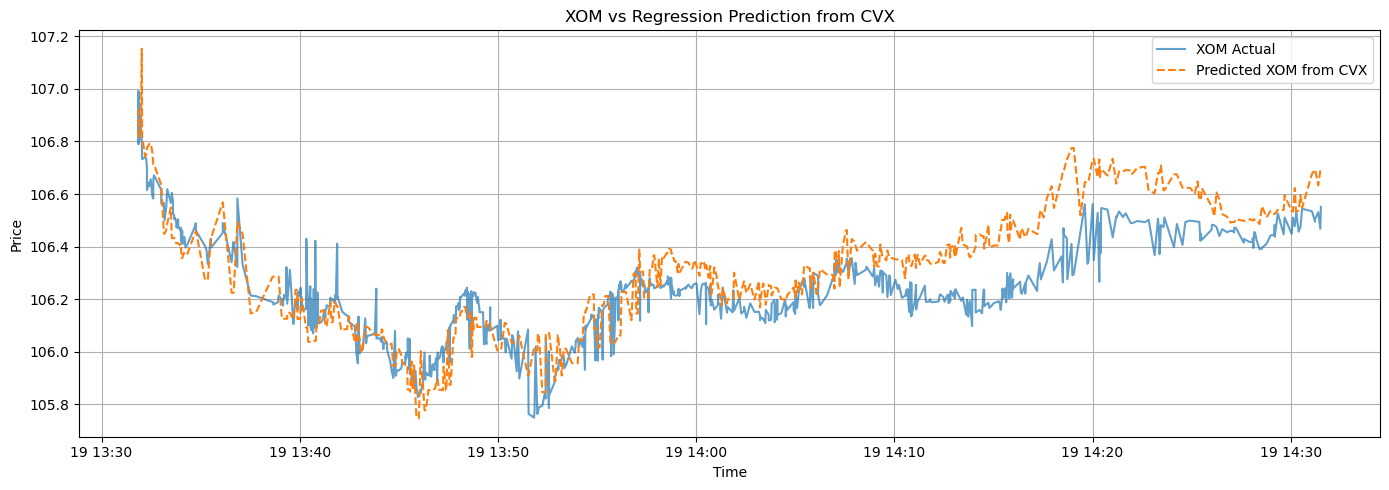

In [96]:
# Plot 1: Actual vs Predicted
plt.figure(figsize=(14, 5))
plt.plot(df_merged.index, df_merged['XOM'], label='XOM Actual', alpha=0.7)
plt.plot(df_merged.index, df_merged['XOM_pred'], label='Predicted XOM from CVX', linestyle='--')
plt.title("XOM vs Regression Prediction from CVX")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

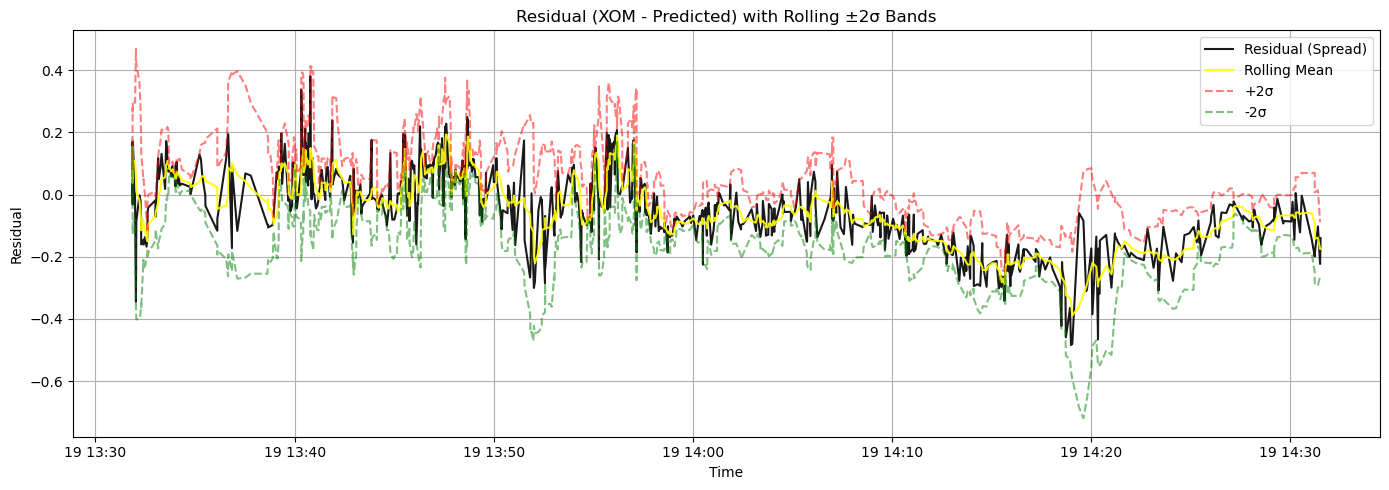

In [97]:
# Plot 2: Residual with ±2sigma bands
plt.figure(figsize=(14, 5))
plt.plot(df_merged.index, df_merged['residual'], label='Residual (Spread)', color='black', alpha=0.9)
plt.plot(df_merged.index, df_merged['resid_mean'], label='Rolling Mean', color='yellow', alpha=0.9)
plt.plot(df_merged.index, df_merged['upper'], label='+2\u03C3', linestyle='--', color='red', alpha=0.5)
plt.plot(df_merged.index, df_merged['lower'], label='-2\u03C3', linestyle='--', color='green', alpha=0.5)
plt.title("Residual (XOM - Predicted) with Rolling ±2\u03C3 Bands")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###  <span style = 'background-color:LightBlue'> Time Range 2 Hours </span>

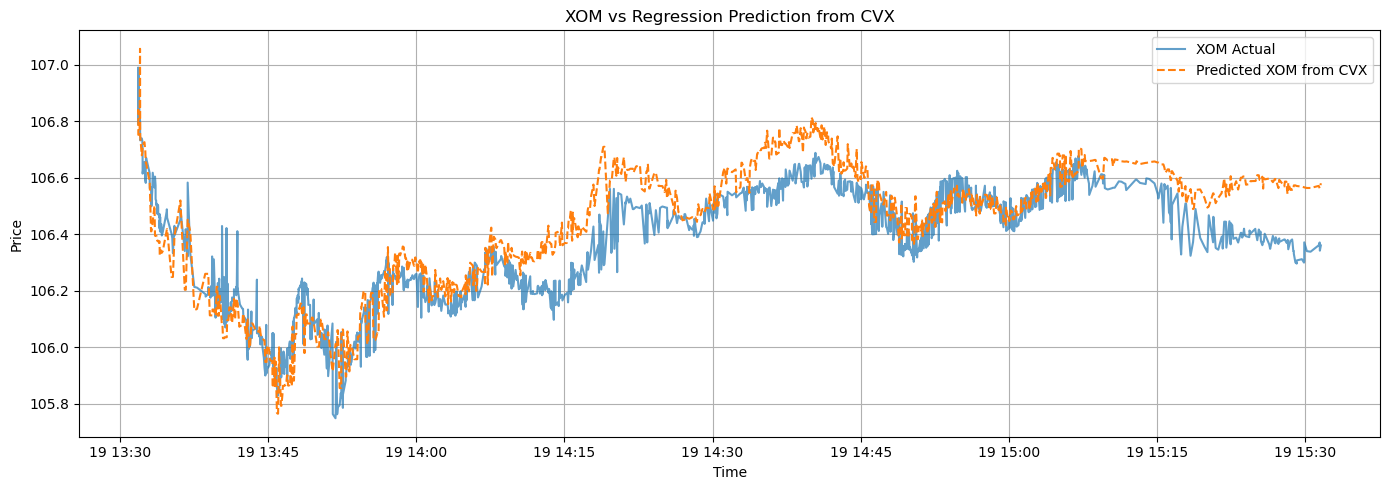

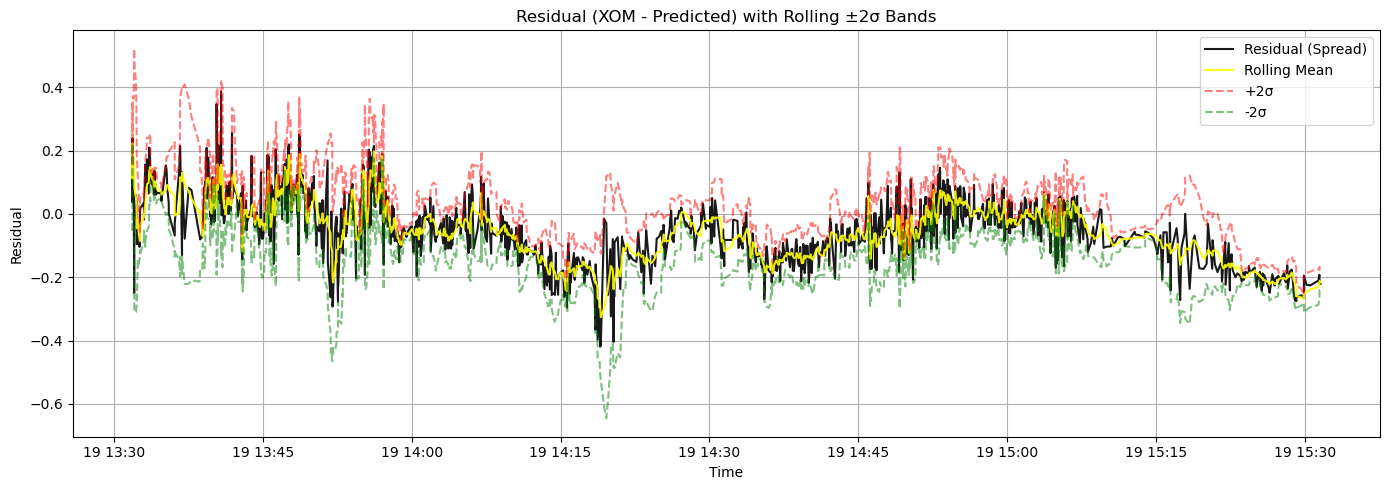

In [98]:
# Load and preprocess
file_path = r"C:\\Users\\ershf\\Documents\\Curvature_Stock_data\\pandas_df_0519.csv"
df = pd.read_csv(file_path, usecols=['ticker', 'close_ts', 'price'])
df['close_ts'] = pd.to_datetime(df['close_ts'])
df = df[df['ticker'].isin(['XOM', 'CVX'])].copy()

# Separate CVX and XOM
cvx_df = df[df['ticker'] == 'CVX'][['close_ts', 'price']].rename(columns={'price': 'CVX'})
xom_df = df[df['ticker'] == 'XOM'][['close_ts', 'price']].rename(columns={'price': 'XOM'})

# Merge on union of timestamps (outer join)
df_merged = pd.merge_asof(
    xom_df.sort_values('close_ts'),
    cvx_df.sort_values('close_ts'),
    on='close_ts',
    direction='nearest',  # or 'backward', or 'forward'
    tolerance=pd.Timedelta(seconds=10)  # optional: max diff for joining
)

df_merged = df_merged.dropna()

df_merged.set_index('close_ts', inplace=True)

start_time = df_merged.index.min()
end_time = start_time + pd.Timedelta(hours=2)
df_merged = df_merged.loc[(df_merged.index >= start_time) & (df_merged.index < end_time)].copy()

# Regression: XOM ~ CVX
X = sm.add_constant(df_merged['CVX'])
y = df_merged['XOM']
model = sm.OLS(y, X).fit()
df_merged['XOM_pred'] = model.predict(X)
df_merged['residual'] = df_merged['XOM'] - df_merged['XOM_pred']

# Rolling stats
window = 6
df_merged['resid_mean'] = df_merged['residual'].rolling(window).mean()
df_merged['resid_std'] = df_merged['residual'].rolling(window).std()
df_merged['upper'] = df_merged['resid_mean'] + 2 * df_merged['resid_std']
df_merged['lower'] = df_merged['resid_mean'] - 2 * df_merged['resid_std']

# Plot 1: Actual vs Predicted
plt.figure(figsize=(14, 5))
plt.plot(df_merged.index, df_merged['XOM'], label='XOM Actual', alpha=0.7)
plt.plot(df_merged.index, df_merged['XOM_pred'], label='Predicted XOM from CVX', linestyle='--')
plt.title("XOM vs Regression Prediction from CVX")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Residual with ±2sigma bands
plt.figure(figsize=(14, 5))
plt.plot(df_merged.index, df_merged['residual'], label='Residual (Spread)', color='black', alpha=0.9)
plt.plot(df_merged.index, df_merged['resid_mean'], label='Rolling Mean', color='yellow', alpha=0.9)
plt.plot(df_merged.index, df_merged['upper'], label='+2\u03C3', linestyle='--', color='red', alpha=0.5)
plt.plot(df_merged.index, df_merged['lower'], label='-2\u03C3', linestyle='--', color='green', alpha=0.5)
plt.title("Residual (XOM - Predicted) with Rolling ±2\u03C3 Bands")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###  <span style = 'background-color:LightBlue'> Time Range 3 Hours </span>

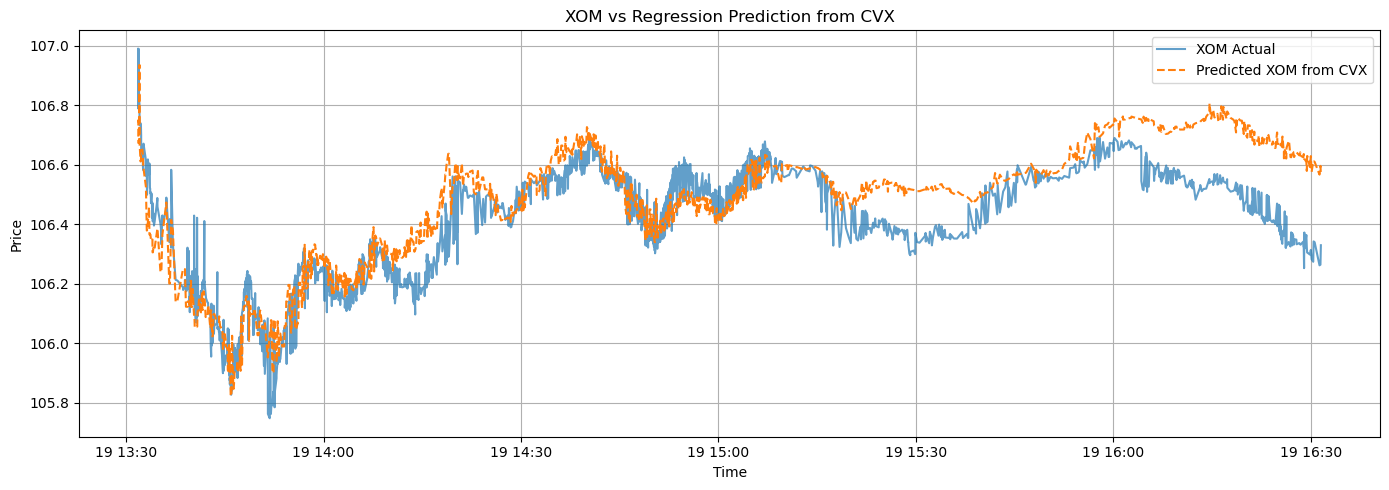

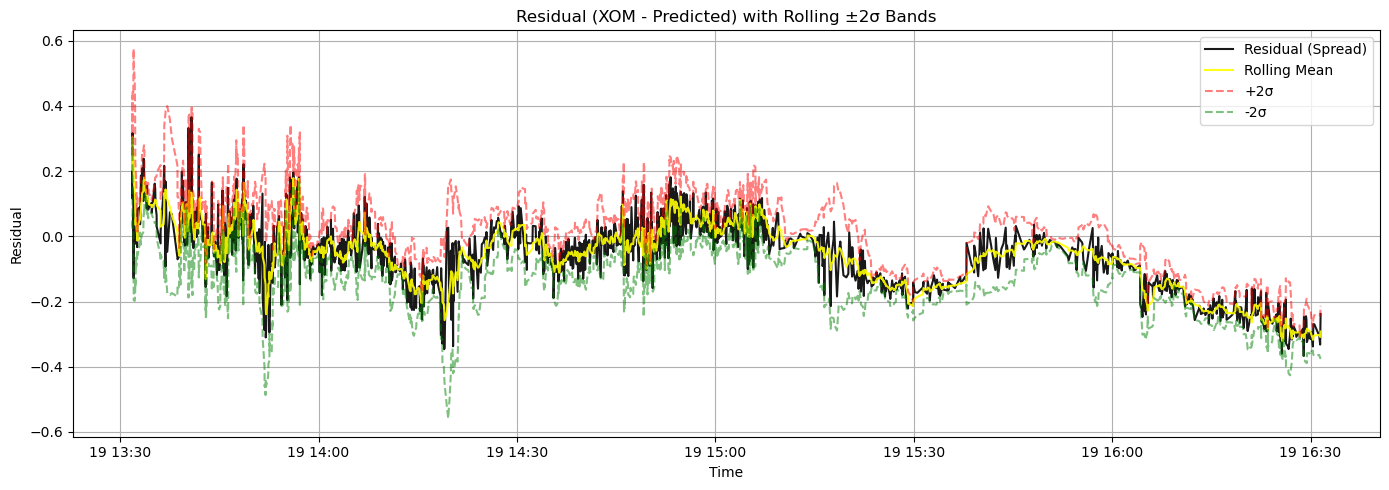

In [99]:
# Load and preprocess
file_path = r"C:\\Users\\ershf\\Documents\\Curvature_Stock_data\\pandas_df_0519.csv"
df = pd.read_csv(file_path, usecols=['ticker', 'close_ts', 'price'])
df['close_ts'] = pd.to_datetime(df['close_ts'])
df = df[df['ticker'].isin(['XOM', 'CVX'])].copy()

# Separate CVX and XOM
cvx_df = df[df['ticker'] == 'CVX'][['close_ts', 'price']].rename(columns={'price': 'CVX'})
xom_df = df[df['ticker'] == 'XOM'][['close_ts', 'price']].rename(columns={'price': 'XOM'})

# Merge on union of timestamps (outer join)
df_merged = pd.merge_asof(
    xom_df.sort_values('close_ts'),
    cvx_df.sort_values('close_ts'),
    on='close_ts',
    direction='nearest',  # or 'backward', or 'forward'
    tolerance=pd.Timedelta(seconds=10)  # optional: max diff for joining
)

df_merged = df_merged.dropna()

df_merged.set_index('close_ts', inplace=True)

start_time = df_merged.index.min()
end_time = start_time + pd.Timedelta(hours=3)
df_merged = df_merged.loc[(df_merged.index >= start_time) & (df_merged.index < end_time)].copy()

# Regression: XOM ~ CVX
X = sm.add_constant(df_merged['CVX'])
y = df_merged['XOM']
model = sm.OLS(y, X).fit()
df_merged['XOM_pred'] = model.predict(X)
df_merged['residual'] = df_merged['XOM'] - df_merged['XOM_pred']

# Rolling stats
window = 6
df_merged['resid_mean'] = df_merged['residual'].rolling(window).mean()
df_merged['resid_std'] = df_merged['residual'].rolling(window).std()
df_merged['upper'] = df_merged['resid_mean'] + 2 * df_merged['resid_std']
df_merged['lower'] = df_merged['resid_mean'] - 2 * df_merged['resid_std']

# Plot 1: Actual vs Predicted
plt.figure(figsize=(14, 5))
plt.plot(df_merged.index, df_merged['XOM'], label='XOM Actual', alpha=0.7)
plt.plot(df_merged.index, df_merged['XOM_pred'], label='Predicted XOM from CVX', linestyle='--')
plt.title("XOM vs Regression Prediction from CVX")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Residual with ±2sigma bands
plt.figure(figsize=(14, 5))
plt.plot(df_merged.index, df_merged['residual'], label='Residual (Spread)', color='black', alpha=0.9)
plt.plot(df_merged.index, df_merged['resid_mean'], label='Rolling Mean', color='yellow', alpha=0.9)
plt.plot(df_merged.index, df_merged['upper'], label='+2\u03C3', linestyle='--', color='red', alpha=0.5)
plt.plot(df_merged.index, df_merged['lower'], label='-2\u03C3', linestyle='--', color='green', alpha=0.5)
plt.title("Residual (XOM - Predicted) with Rolling ±2\u03C3 Bands")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###  <span style = 'background-color:LightBlue'> Time Range 4 Hours </span>

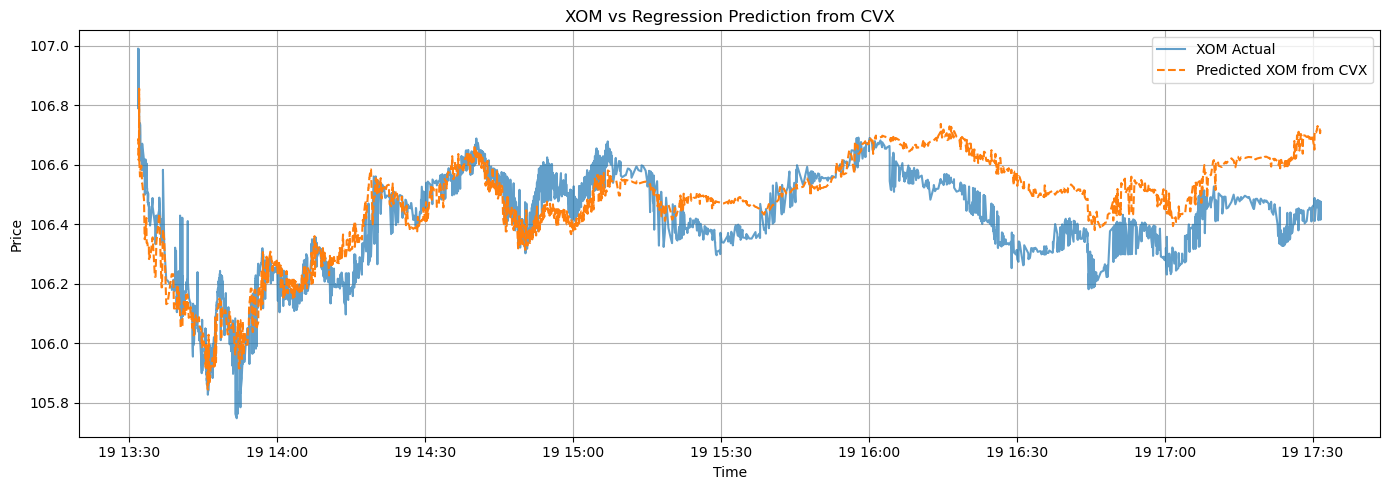

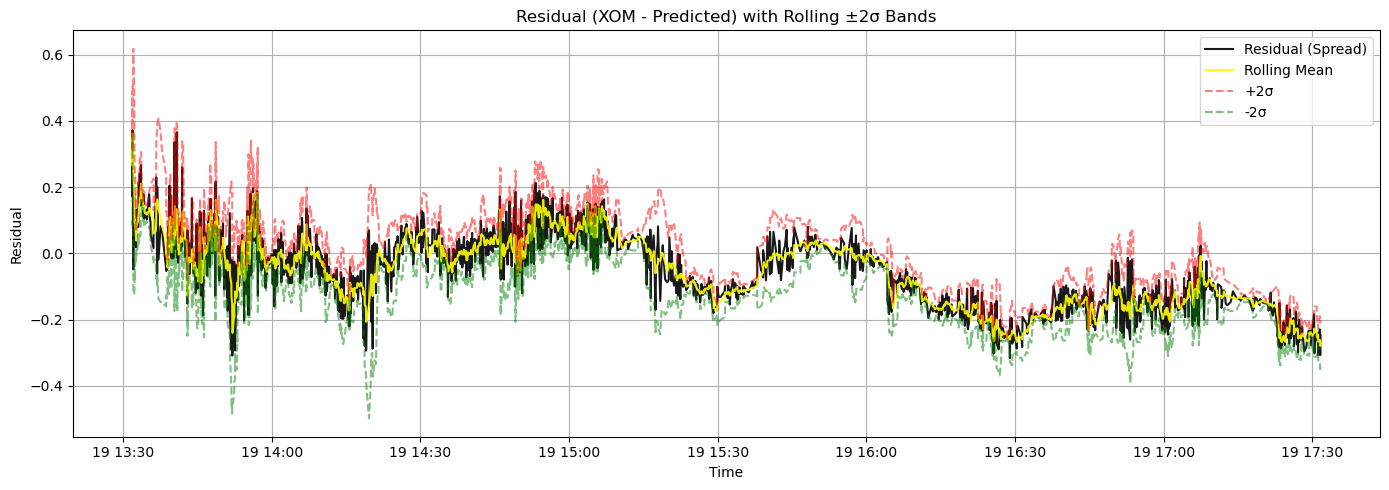

In [100]:
# Load and preprocess
file_path = r"C:\\Users\\ershf\\Documents\\Curvature_Stock_data\\pandas_df_0519.csv"
df = pd.read_csv(file_path, usecols=['ticker', 'close_ts', 'price'])
df['close_ts'] = pd.to_datetime(df['close_ts'])
df = df[df['ticker'].isin(['XOM', 'CVX'])].copy()

# Separate CVX and XOM
cvx_df = df[df['ticker'] == 'CVX'][['close_ts', 'price']].rename(columns={'price': 'CVX'})
xom_df = df[df['ticker'] == 'XOM'][['close_ts', 'price']].rename(columns={'price': 'XOM'})

# Merge on union of timestamps (outer join)
df_merged = pd.merge_asof(
    xom_df.sort_values('close_ts'),
    cvx_df.sort_values('close_ts'),
    on='close_ts',
    direction='nearest',  # or 'backward', or 'forward'
    tolerance=pd.Timedelta(seconds=10)  # optional: max diff for joining
)

df_merged = df_merged.dropna()

df_merged.set_index('close_ts', inplace=True)

start_time = df_merged.index.min()
end_time = start_time + pd.Timedelta(hours=4)
df_merged = df_merged.loc[(df_merged.index >= start_time) & (df_merged.index < end_time)].copy()

# Regression: XOM ~ CVX
X = sm.add_constant(df_merged['CVX'])
y = df_merged['XOM']
model = sm.OLS(y, X).fit()
df_merged['XOM_pred'] = model.predict(X)
df_merged['residual'] = df_merged['XOM'] - df_merged['XOM_pred']

# Rolling stats
window = 6
df_merged['resid_mean'] = df_merged['residual'].rolling(window).mean()
df_merged['resid_std'] = df_merged['residual'].rolling(window).std()
df_merged['upper'] = df_merged['resid_mean'] + 2 * df_merged['resid_std']
df_merged['lower'] = df_merged['resid_mean'] - 2 * df_merged['resid_std']

# Plot 1: Actual vs Predicted
plt.figure(figsize=(14, 5))
plt.plot(df_merged.index, df_merged['XOM'], label='XOM Actual', alpha=0.7)
plt.plot(df_merged.index, df_merged['XOM_pred'], label='Predicted XOM from CVX', linestyle='--')
plt.title("XOM vs Regression Prediction from CVX")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Residual with ±2sigma bands
plt.figure(figsize=(14, 5))
plt.plot(df_merged.index, df_merged['residual'], label='Residual (Spread)', color='black', alpha=0.9)
plt.plot(df_merged.index, df_merged['resid_mean'], label='Rolling Mean', color='yellow', alpha=0.9)
plt.plot(df_merged.index, df_merged['upper'], label='+2\u03C3', linestyle='--', color='red', alpha=0.5)
plt.plot(df_merged.index, df_merged['lower'], label='-2\u03C3', linestyle='--', color='green', alpha=0.5)
plt.title("Residual (XOM - Predicted) with Rolling ±2\u03C3 Bands")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###  <span style = 'background-color:LightBlue'> Time Range 5 Hours </span>

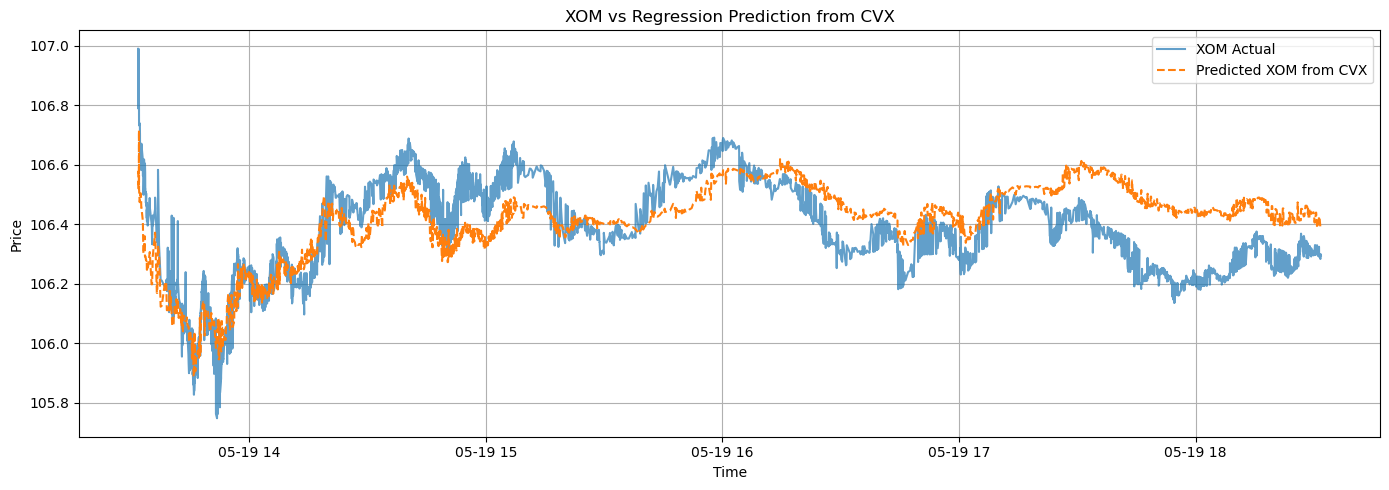

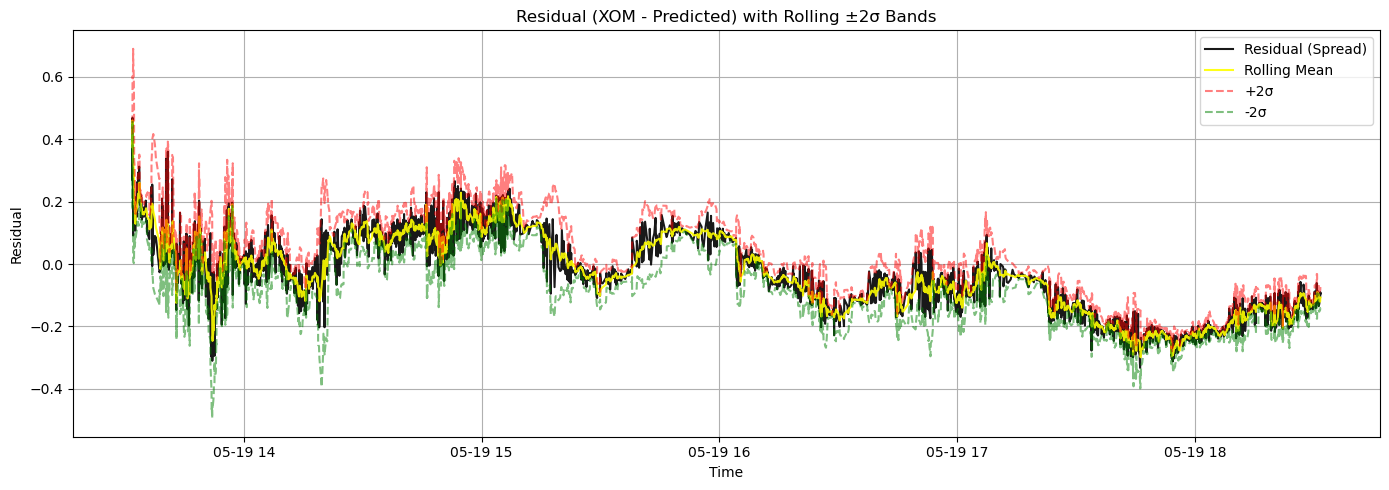

In [101]:
# Load and preprocess
file_path = r"C:\\Users\\ershf\\Documents\\Curvature_Stock_data\\pandas_df_0519.csv"
df = pd.read_csv(file_path, usecols=['ticker', 'close_ts', 'price'])
df['close_ts'] = pd.to_datetime(df['close_ts'])
df = df[df['ticker'].isin(['XOM', 'CVX'])].copy()

# Separate CVX and XOM
cvx_df = df[df['ticker'] == 'CVX'][['close_ts', 'price']].rename(columns={'price': 'CVX'})
xom_df = df[df['ticker'] == 'XOM'][['close_ts', 'price']].rename(columns={'price': 'XOM'})

# Merge on union of timestamps (outer join)
df_merged = pd.merge_asof(
    xom_df.sort_values('close_ts'),
    cvx_df.sort_values('close_ts'),
    on='close_ts',
    direction='nearest',  # or 'backward', or 'forward'
    tolerance=pd.Timedelta(seconds=10)  # optional: max diff for joining
)

df_merged = df_merged.dropna()

df_merged.set_index('close_ts', inplace=True)

start_time = df_merged.index.min()
end_time = start_time + pd.Timedelta(hours=5)
df_merged = df_merged.loc[(df_merged.index >= start_time) & (df_merged.index < end_time)].copy()

# Regression: XOM ~ CVX
X = sm.add_constant(df_merged['CVX'])
y = df_merged['XOM']
model = sm.OLS(y, X).fit()
df_merged['XOM_pred'] = model.predict(X)
df_merged['residual'] = df_merged['XOM'] - df_merged['XOM_pred']

# Rolling stats
window = 6
df_merged['resid_mean'] = df_merged['residual'].rolling(window).mean()
df_merged['resid_std'] = df_merged['residual'].rolling(window).std()
df_merged['upper'] = df_merged['resid_mean'] + 2 * df_merged['resid_std']
df_merged['lower'] = df_merged['resid_mean'] - 2 * df_merged['resid_std']

# Plot 1: Actual vs Predicted
plt.figure(figsize=(14, 5))
plt.plot(df_merged.index, df_merged['XOM'], label='XOM Actual', alpha=0.7)
plt.plot(df_merged.index, df_merged['XOM_pred'], label='Predicted XOM from CVX', linestyle='--')
plt.title("XOM vs Regression Prediction from CVX")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Residual with ±2sigma bands
plt.figure(figsize=(14, 5))
plt.plot(df_merged.index, df_merged['residual'], label='Residual (Spread)', color='black', alpha=0.9)
plt.plot(df_merged.index, df_merged['resid_mean'], label='Rolling Mean', color='yellow', alpha=0.9)
plt.plot(df_merged.index, df_merged['upper'], label='+2\u03C3', linestyle='--', color='red', alpha=0.5)
plt.plot(df_merged.index, df_merged['lower'], label='-2\u03C3', linestyle='--', color='green', alpha=0.5)
plt.title("Residual (XOM - Predicted) with Rolling ±2\u03C3 Bands")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================================
# May 20

### <span style = 'background-color:lightblue'> Time Range 2 Hours </span>

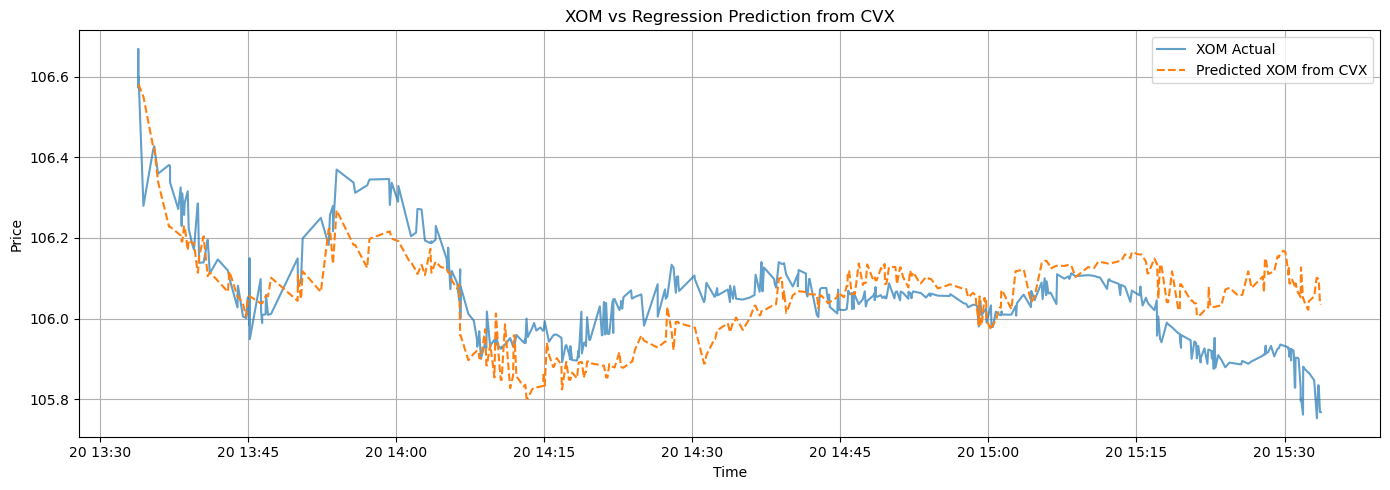

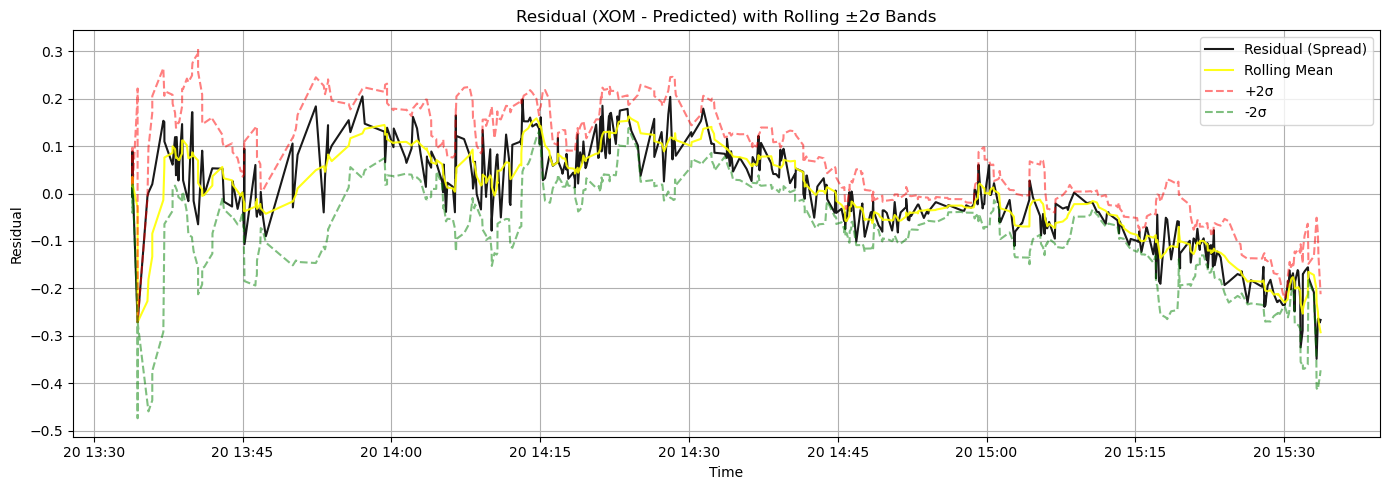

In [103]:
# Load and preprocess
file_path = r"C:\\Users\\ershf\\Documents\\Curvature_Stock_data\\pandas_df_0520.csv"
df = pd.read_csv(file_path, usecols=['ticker', 'close_ts', 'price'])
df['close_ts'] = pd.to_datetime(df['close_ts'])
df = df[df['ticker'].isin(['XOM', 'CVX'])].copy()

# Separate CVX and XOM
cvx_df = df[df['ticker'] == 'CVX'][['close_ts', 'price']].rename(columns={'price': 'CVX'})
xom_df = df[df['ticker'] == 'XOM'][['close_ts', 'price']].rename(columns={'price': 'XOM'})

# Merge on union of timestamps (outer join)
df_merged = pd.merge_asof(
    xom_df.sort_values('close_ts'),
    cvx_df.sort_values('close_ts'),
    on='close_ts',
    direction='nearest',  # or 'backward', or 'forward'
    tolerance=pd.Timedelta(seconds=10)  # optional: max diff for joining
)

df_merged = df_merged.dropna()

df_merged.set_index('close_ts', inplace=True)

start_time = df_merged.index.min()
end_time = start_time + pd.Timedelta(hours=2)
df_merged = df_merged.loc[(df_merged.index >= start_time) & (df_merged.index < end_time)].copy()

# Regression: XOM ~ CVX
X = sm.add_constant(df_merged['CVX'])
y = df_merged['XOM']
model = sm.OLS(y, X).fit()
df_merged['XOM_pred'] = model.predict(X)
df_merged['residual'] = df_merged['XOM'] - df_merged['XOM_pred']

# Rolling stats
window = 6
df_merged['resid_mean'] = df_merged['residual'].rolling(window).mean()
df_merged['resid_std'] = df_merged['residual'].rolling(window).std()
df_merged['upper'] = df_merged['resid_mean'] + 2 * df_merged['resid_std']
df_merged['lower'] = df_merged['resid_mean'] - 2 * df_merged['resid_std']

# Plot 1: Actual vs Predicted
plt.figure(figsize=(14, 5))
plt.plot(df_merged.index, df_merged['XOM'], label='XOM Actual', alpha=0.7)
plt.plot(df_merged.index, df_merged['XOM_pred'], label='Predicted XOM from CVX', linestyle='--')
plt.title("XOM vs Regression Prediction from CVX")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Residual with ±2sigma bands
plt.figure(figsize=(14, 5))
plt.plot(df_merged.index, df_merged['residual'], label='Residual (Spread)', color='black', alpha=0.9)
plt.plot(df_merged.index, df_merged['resid_mean'], label='Rolling Mean', color='yellow', alpha=0.9)
plt.plot(df_merged.index, df_merged['upper'], label='+2\u03C3', linestyle='--', color='red', alpha=0.5)
plt.plot(df_merged.index, df_merged['lower'], label='-2\u03C3', linestyle='--', color='green', alpha=0.5)
plt.title("Residual (XOM - Predicted) with Rolling ±2\u03C3 Bands")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================================
# May 21

### <span style = 'background-color:lightblue'> Time Range 2 Hours </span>

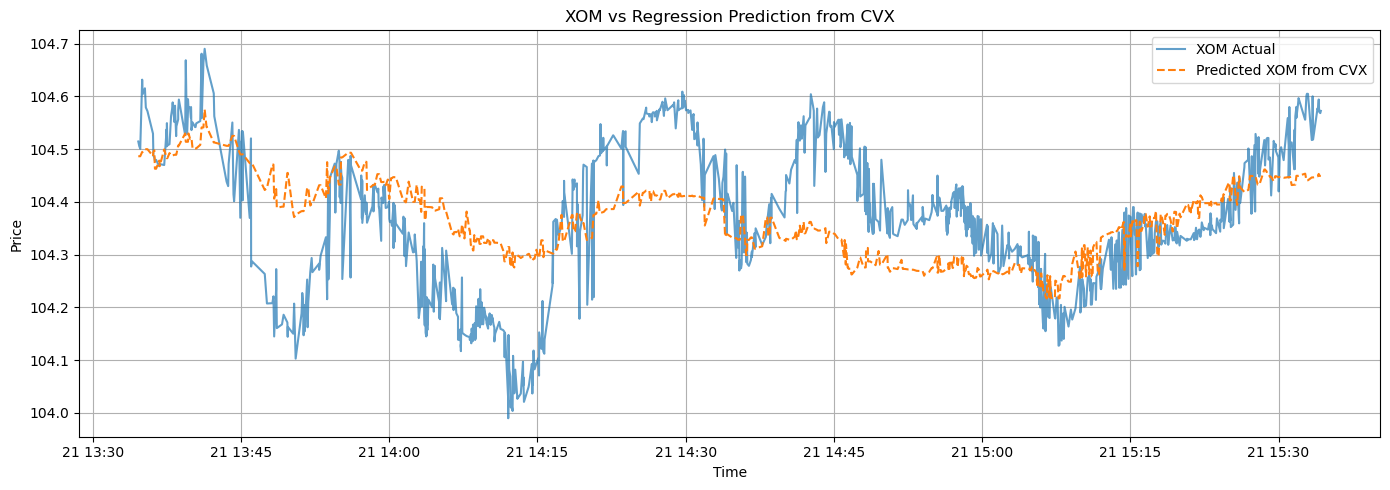

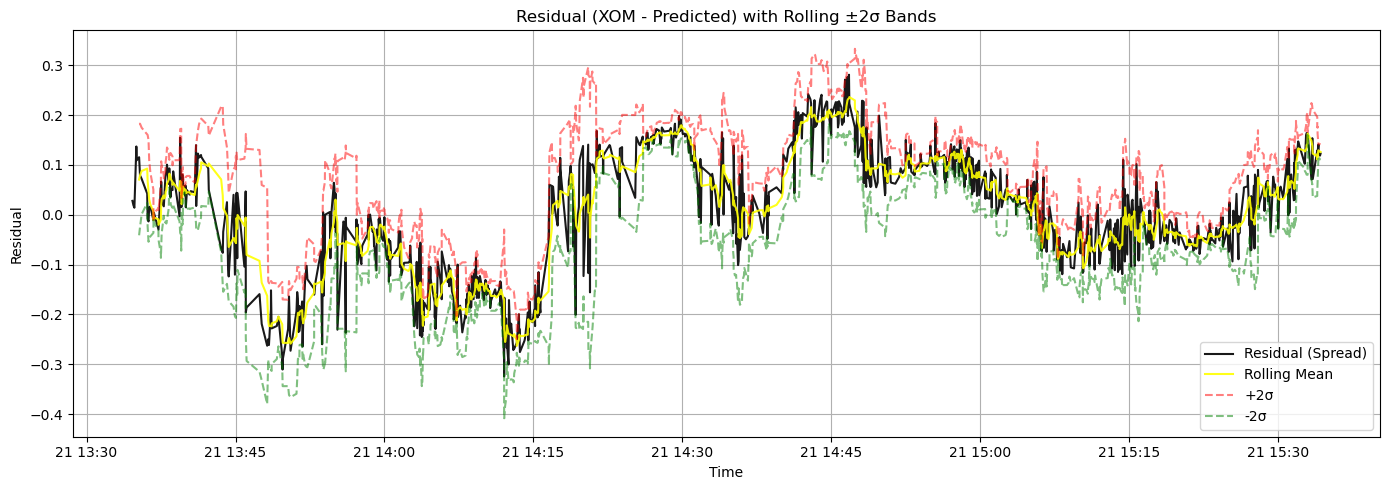

In [105]:
# Load and preprocess
file_path = r"C:\\Users\\ershf\\Documents\\Curvature_Stock_data\\pandas_df_0521.csv"
df = pd.read_csv(file_path, usecols=['ticker', 'close_ts', 'price'])
df['close_ts'] = pd.to_datetime(df['close_ts'])
df = df[df['ticker'].isin(['XOM', 'CVX'])].copy()

# Separate CVX and XOM
cvx_df = df[df['ticker'] == 'CVX'][['close_ts', 'price']].rename(columns={'price': 'CVX'})
xom_df = df[df['ticker'] == 'XOM'][['close_ts', 'price']].rename(columns={'price': 'XOM'})

# Merge on union of timestamps (outer join)
df_merged = pd.merge_asof(
    xom_df.sort_values('close_ts'),
    cvx_df.sort_values('close_ts'),
    on='close_ts',
    direction='nearest',  # or 'backward', or 'forward'
    tolerance=pd.Timedelta(seconds=10)  # optional: max diff for joining
)

df_merged = df_merged.dropna()

df_merged.set_index('close_ts', inplace=True)

start_time = df_merged.index.min()
end_time = start_time + pd.Timedelta(hours=2)
df_merged = df_merged.loc[(df_merged.index >= start_time) & (df_merged.index < end_time)].copy()

# Regression: XOM ~ CVX
X = sm.add_constant(df_merged['CVX'])
y = df_merged['XOM']
model = sm.OLS(y, X).fit()
df_merged['XOM_pred'] = model.predict(X)
df_merged['residual'] = df_merged['XOM'] - df_merged['XOM_pred']

# Rolling stats
window = 6
df_merged['resid_mean'] = df_merged['residual'].rolling(window).mean()
df_merged['resid_std'] = df_merged['residual'].rolling(window).std()
df_merged['upper'] = df_merged['resid_mean'] + 2 * df_merged['resid_std']
df_merged['lower'] = df_merged['resid_mean'] - 2 * df_merged['resid_std']

# Plot 1: Actual vs Predicted
plt.figure(figsize=(14, 5))
plt.plot(df_merged.index, df_merged['XOM'], label='XOM Actual', alpha=0.7)
plt.plot(df_merged.index, df_merged['XOM_pred'], label='Predicted XOM from CVX', linestyle='--')
plt.title("XOM vs Regression Prediction from CVX")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Residual with ±2sigma bands
plt.figure(figsize=(14, 5))
plt.plot(df_merged.index, df_merged['residual'], label='Residual (Spread)', color='black', alpha=0.9)
plt.plot(df_merged.index, df_merged['resid_mean'], label='Rolling Mean', color='yellow', alpha=0.9)
plt.plot(df_merged.index, df_merged['upper'], label='+2\u03C3', linestyle='--', color='red', alpha=0.5)
plt.plot(df_merged.index, df_merged['lower'], label='-2\u03C3', linestyle='--', color='green', alpha=0.5)
plt.title("Residual (XOM - Predicted) with Rolling ±2\u03C3 Bands")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()